In [1]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [4]:
df.shape

(23, 2)

In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


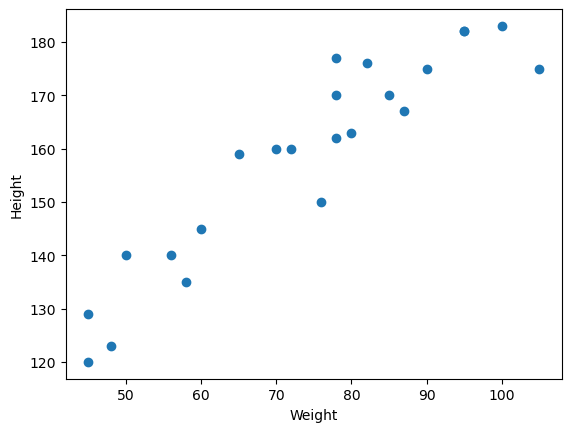

In [6]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

# Steps for Model Building
### - Divide features based on Independent and Dependent Features.
### - Train Test Split of Data
### - Standardize the data

In [7]:
X = df["Weight"]
y = df["Height"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, y_train.shape

((18,), (18,))

In [11]:
X_test.shape, y_test.shape

((5,), (5,))

In [12]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [13]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

### Before Standardisation

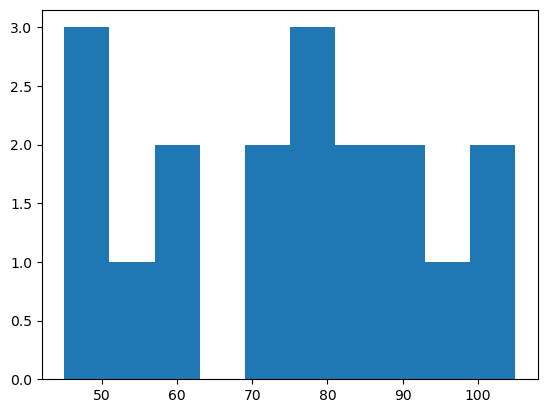

In [14]:
plt.hist(X_train)
plt.show()

In [15]:
#Standardize X_Train values
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
#X_test in only transformed to avoid data leakage
X_test = scaler.transform(X_test)

### After Standardisation

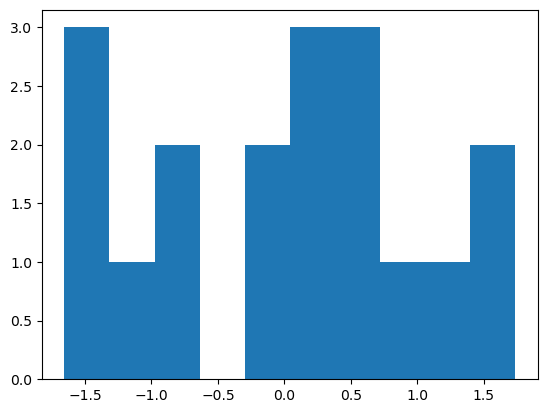

In [18]:
plt.hist(X_train)
plt.show()

In [19]:
#Train the model
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print("Slope or Coefficient of weight : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Slope or Coefficient of weight :  [17.03440872]
Intercept :  157.5


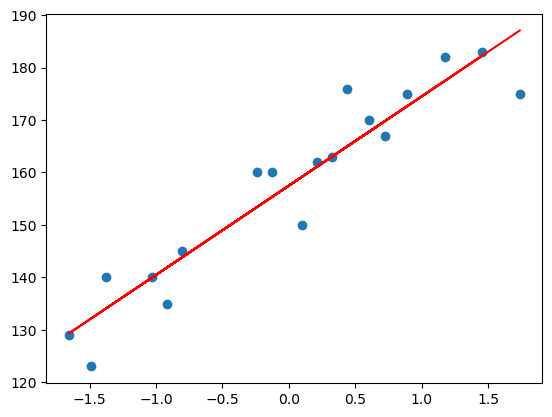

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='r')

In [24]:
regressor.predict(X_train)

array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
       132.19329381, 177.45645118, 129.3041561 , 143.74984463,
       153.38030364, 159.15857905, 134.11938561, 139.89766102,
       155.30639545, 172.64122168, 164.93685446, 167.82599217,
       169.75208397, 163.01076266])

In [25]:
for i in X_train:
    print(regressor.intercept_+i*regressor.coef_)

[187.0869102]
[141.82375282]
[182.27168069]
[161.08467086]
[132.19329381]
[177.45645118]
[129.3041561]
[143.74984463]
[153.38030364]
[159.15857905]
[134.11938561]
[139.89766102]
[155.30639545]
[172.64122168]
[164.93685446]
[167.82599217]
[169.75208397]
[163.01076266]


### Prediction of Test data

In [26]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

<function matplotlib.pyplot.show(close=None, block=None)>

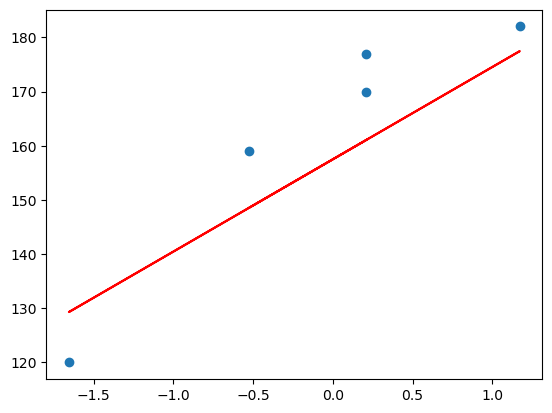

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color='r')
plt.show

### Performance Matrix

MSE, MAE, RMSE, R Squared, Adjusted R Squared

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### For Test data

In [29]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mse,mae, rmse

(109.77592599051664, 9.822657814519232, 10.477400726827081)

In [30]:
from sklearn.metrics import r2_score

In [31]:
score = r2_score(y_test, y_pred_test)
score

0.776986986042344

### Adjusted R^2

In [32]:
N = len(y_test)
P = 1#No. of Independent Features

1-((1-score)*(N-1)/(N-P-1))

0.7026493147231252

In [33]:
### For new data point i.e 80 Kgs
scaled_weight = scaler.transform([[80]])
regressor.predict(scaled_weight)

array([163.01076266])

### Assumptions for Regression

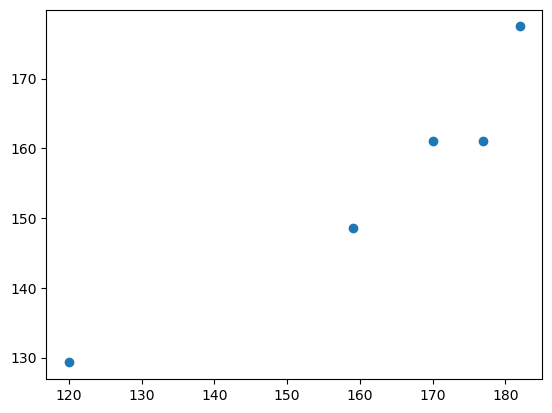

In [34]:
plt.scatter(y_test, y_pred_test)
#plt.plot(y_test, y_pred_test)

In [35]:
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

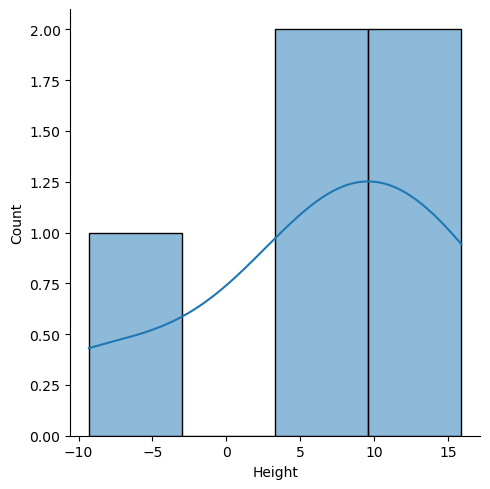

In [36]:
sns.displot(residuals, kde=True)

# Multiple Linear Regression

In [37]:
from sklearn.datasets import fetch_california_housing

In [38]:
california = fetch_california_housing()

In [39]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
type(california)

sklearn.utils._bunch.Bunch

In [42]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [44]:
df = pd.DataFrame(california)
df.head()

ValueError: Per-column arrays must each be 1-dimensional

In [45]:
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [47]:
print(california['target'])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [48]:
#Converting to DataFrame

df = pd.DataFrame(california.data, columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
df["Price"] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [56]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [57]:
#Counting Missing values
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
#sns.pairplot(df)

In [58]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

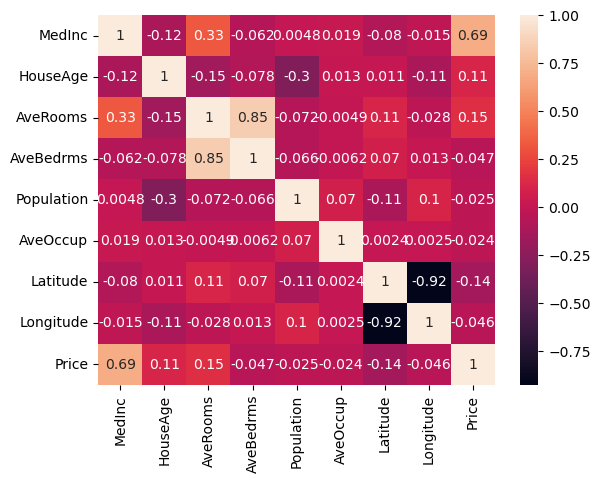

In [59]:
sns.heatmap(df.corr(), annot=True)

In [60]:
X = df.iloc[:,:-1]
X.shape

(20640, 8)

In [61]:
y = df.iloc[:, -1]
y.shape

(20640,)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [64]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regressor = LinearRegression()

In [71]:
regressor.fit(X_train, y_train)

LinearRegression()

In [72]:
print("Coefficients/Slopes",regressor.coef_)

Coefficients/Slopes [ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
 -0.93017985 -0.89505497]


In [74]:
print("Intercept : ",regressor.intercept_)

Intercept :  2.0634768086491184


In [75]:
y_test_hat = regressor.predict(X_test)
y_test_hat

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE = ", mean_squared_error(y_test, y_test_hat))
print("MAE = ", mean_absolute_error(y_test, y_test_hat))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_test_hat)))

MSE =  0.5522332399363619
MAE =  0.537105694300796
RMSE =  0.7431239734636219


In [ ]:
from sklearn.metrics import r2_score

In [80]:
r2 = r2_score(y_test, y_test_hat)
num_data_points = X_test.shape[0]
num_feat = X_test.shape[1]
r2_adjusted = 1-(((1-r2)*(num_data_points-1))/(num_data_points-num_feat-1))
print(r2)
print(r2_adjusted)

0.593595852643664
0.5931179409607519


### Assumptions

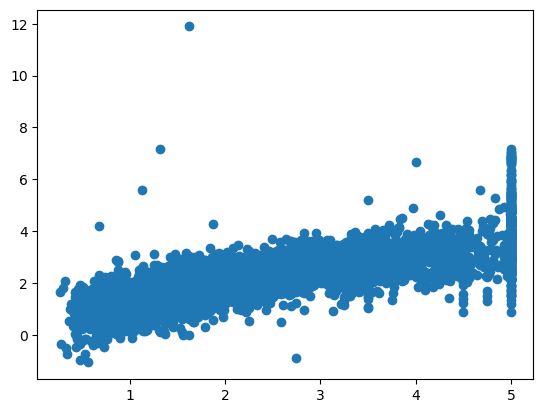

In [81]:
#Testing model using Assumptions
plt.scatter(y_test, y_test_hat)

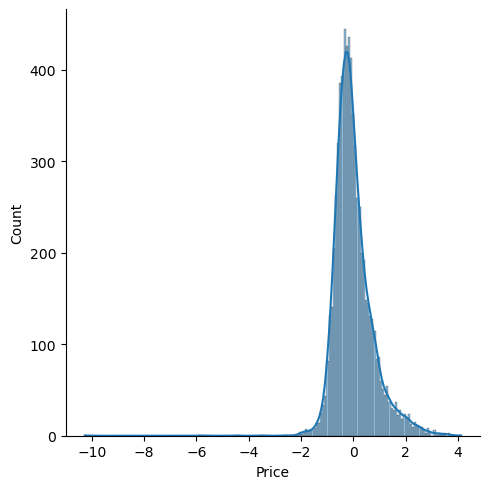

In [82]:
residuals = y_test-y_test_hat
sns.displot(residuals, kde=True)

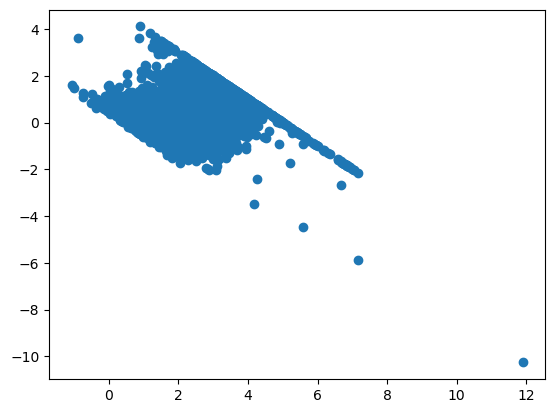

In [83]:
plt.scatter(y_test_hat, residuals)

# Saving the model

In [85]:
import pickle

In [86]:
pickle.dump(regressor, open("regressor.pkl", 'wb'))

In [ ]:
model = pickle.load(open('regressor.pkl', 'rb'))

In [ ]:
model.predict(X_test)